In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("co_properties.csv")
data.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [3]:
data

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,...,4.0,NaN,NaN,7.000000e+08,COP,NaN,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta


In [4]:
"""
Id : Id of property
l1 : Country
l2 : Department
l3 : City
l4 : Zone
l5 : Locality
l6 : Neighborhood
"""

'\nId : Id of property\nl1 : Country\nl2 : Department\nl3 : City\nl4 : Zone\nl5 : Locality\nl6 : Neighborhood\n'

#### Check null values

In [5]:
null_values=data.isnull().sum()/len(data)*100
null_values.sort_values()



id                  0.0000
property_type       0.0000
l2                  0.0000
l1                  0.0000
operation_type      0.0000
end_date            0.0000
start_date          0.0000
ad_type             0.0000
created_on          0.0000
title               0.0012
price               0.0509
currency            0.0550
description         0.0644
l3                  6.2812
bathrooms          20.0507
lon                25.9718
lat                25.9719
bedrooms           62.3954
l4                 72.6005
rooms              82.7913
l5                 84.0873
price_period       87.8833
surface_covered    94.0091
l6                 94.5253
surface_total      95.8758
dtype: float64

In [6]:
percetage_50=[]
for column in null_values.index:
    if null_values[column]>50:
        print(column, null_values[column])
        percetage_50.append(column)
data=data.drop(columns=percetage_50)
data

l4 72.6005
l5 84.0873
l6 94.5253
rooms 82.7913
bedrooms 62.3954
surface_total 95.8758
surface_covered 94.0091
price_period 87.88329999999999


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,7.0,1.300000e+09,COP,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,7.0,2.800000e+09,COP,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,7.0,2.800000e+09,COP,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,8.0,3.500000e+09,COP,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,9.0,4.800000e+08,COP,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,7.000000e+05,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,7.000000e+05,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,7.000000e+05,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,4.0,7.000000e+08,COP,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta


In [7]:
data["created_on"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2020-10-07
1         2020-10-07
2         2020-10-07
3         2020-10-07
4         2020-10-07
             ...    
999995    2021-03-31
999996    2021-03-31
999997    2021-03-31
999998    2021-03-31
999999    2021-03-31
Name: created_on, Length: 1000000, dtype: object>

In [8]:
data["operation_type"].value_counts()

Venta                571884
Arriendo             427736
Arriendo temporal       380
Name: operation_type, dtype: int64

In [9]:
data["currency"].value_counts()

COP    999402
USD        43
ARS         5
Name: currency, dtype: int64

In [10]:
data["property_type"].value_counts()

Apartamento        565404
Casa               220101
Otro               111046
Lote                46369
Local comercial     26389
Oficina             22258
Finca                6725
Depósito             1544
Parqueadero           164
Name: property_type, dtype: int64

In [11]:
data=data[(data["currency"]!="ARS") & (data["currency"]!="USD")]
data["currency"].value_counts()

COP    999402
Name: currency, dtype: int64

In [12]:
data["l3"].value_counts()[:10].index

Index(['Medellín', 'Bogotá D.C', 'Cali', 'Barranquilla', 'Bucaramanga',
       'Manizales', 'Envigado', 'Cúcuta', 'Pereira', 'Floridablanca'],
      dtype='object')

In [13]:
data = data[data["l3"].isin(data["l3"].value_counts()[:10].index)]
data= data.dropna(how='any')
sales_data=data[(data["operation_type"]=="Venta") & (data["property_type"]=="Apartamento")]
rent_data=data[(data["operation_type"]=="Arriendo") & (data["property_type"]=="Apartamento")]

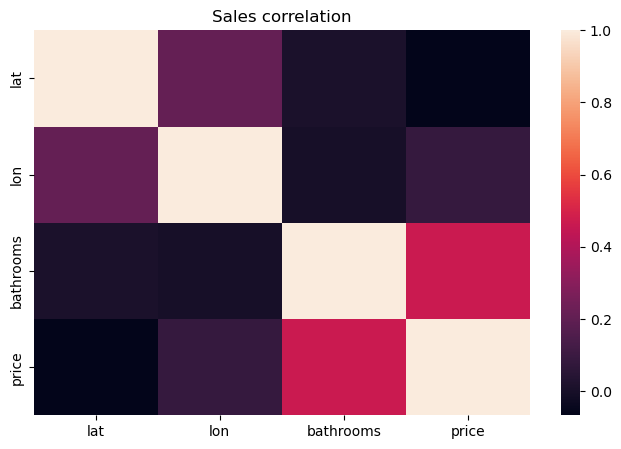

In [14]:
corr=sales_data.corr ()
# plot the heatmap
plt.rcParams["figure.figsize"] = (8,5)
plt.title("Sales correlation")
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

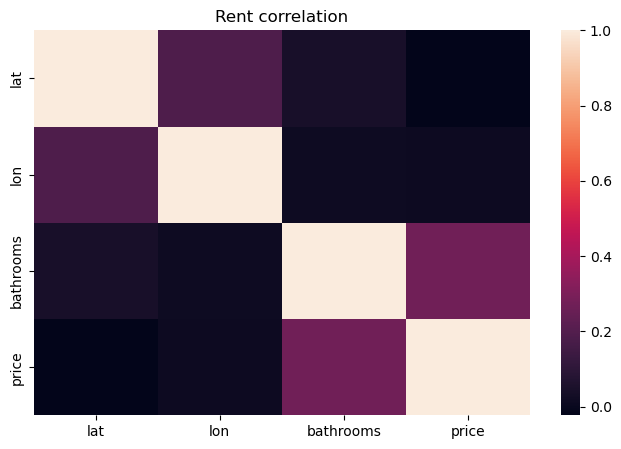

In [15]:
corr=rent_data.corr ()
# plot the heatmap
plt.rcParams["figure.figsize"] = (8,5)
plt.title("Rent correlation")
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

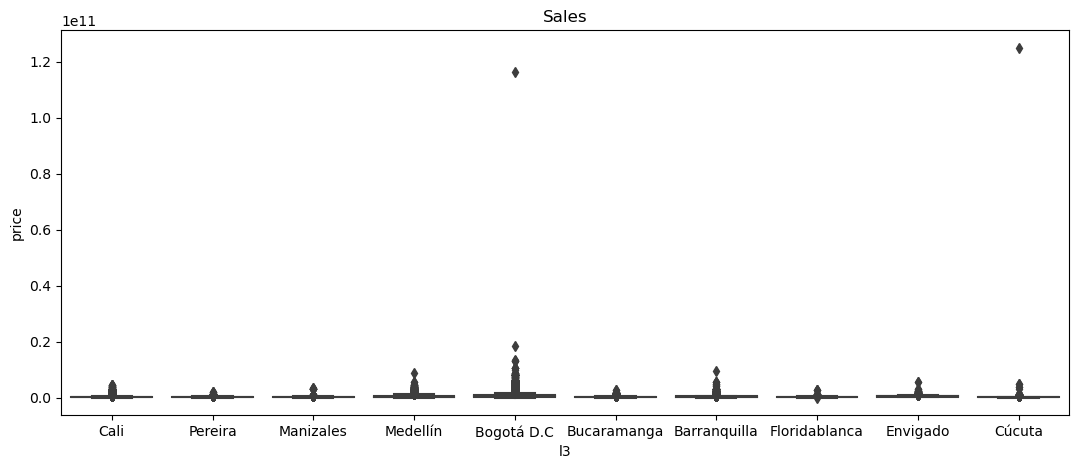

In [16]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales")
sns.boxplot(x='l3', y='price', data=sales_data)
plt.show()

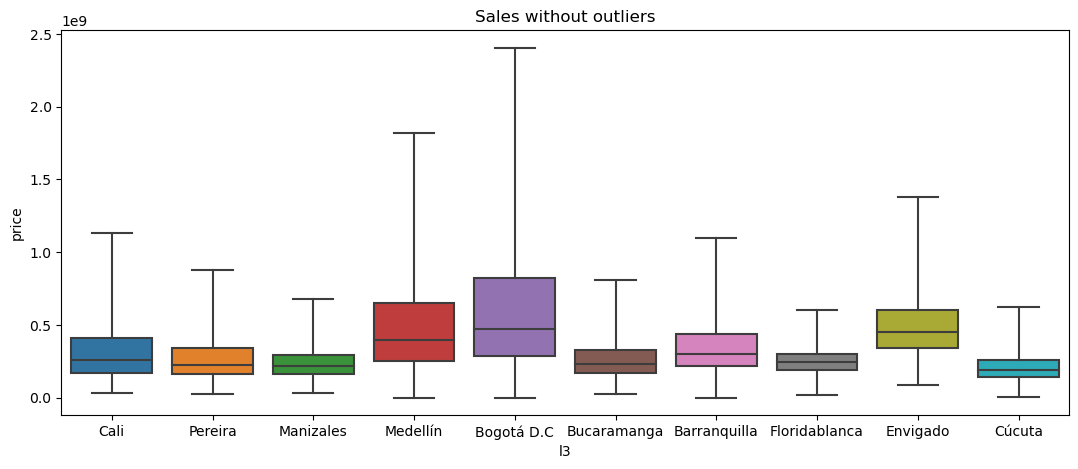

In [17]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales without outliers")
sns.boxplot(x='l3', y='price', data=sales_data, whis=3, sym='')
plt.show()

In [18]:
sales_bogota=sales_data[sales_data["l3"]=="Bogotá D.C"]

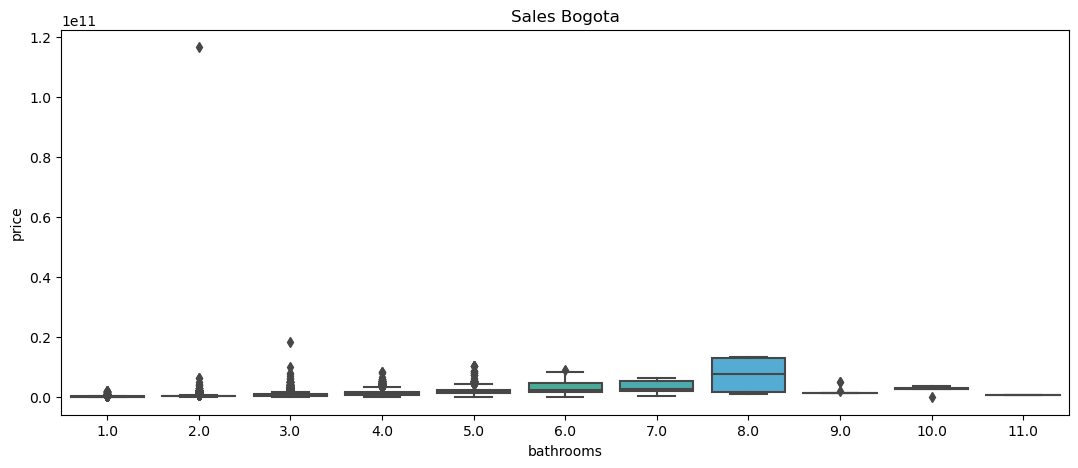

In [19]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales Bogota")
sns.boxplot(x='bathrooms', y='price', data=sales_bogota)
plt.show()

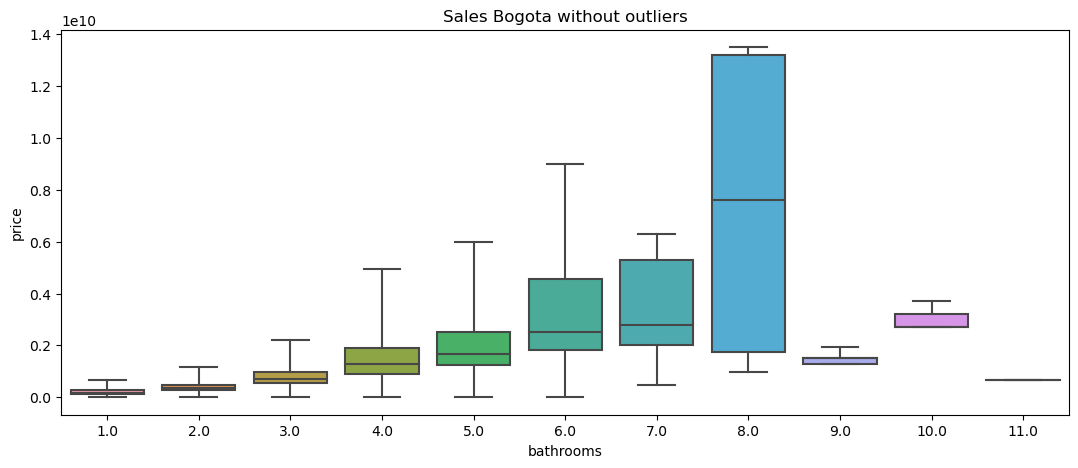

In [20]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales Bogota without outliers")
sns.boxplot(x='bathrooms', y='price', data=sales_bogota, whis=3, sym='')
plt.show()

In [22]:
X = sales_bogota[["bathrooms"]]
y = sales_bogota['price']

X = X.to_numpy()
y = y.to_numpy()

import statsmodels.api as sm

# Add a column of ones to X to represent the intercept term
X = sm.add_constant(X)

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Print the coefficients
print('Coefficients:', coefficients)

# Create a model and fit it to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Coefficients: [-4.70323739e+08  4.73721813e+08]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                 1.883e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:54:14   Log-Likelihood:            -9.8031e+05
No. Observations:               44767   AIC:                         1.961e+06
Df Residuals:                   44765   BIC:                         1.961e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons